In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
aord = pd.read_csv('../W3/data/indice/ALLOrdinary.csv')
nikkei = pd.read_csv('../W3/data/indice/Nikkei225.csv')
hsi = pd.read_csv('../W3/data/indice/HSI.csv')
daxi = pd.read_csv('../W3/data/indice/DAXI.csv')
cac40 = pd.read_csv('../W3/data/indice/CAC40.csv')
sp500 = pd.read_csv('../W3/data/indice/SP500.csv')
dji = pd.read_csv('../W3/data/indice/DJI.csv')
nasdaq = pd.read_csv('../W3/data/indice/nasdaq_composite.csv')
spy = pd.read_csv('../W3/data/indice/SPY.csv')

In [8]:
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,2653.909912,2661.500000,2597.810059,2609.629883,2609.629883,2076690000
1,2008-01-03,2611.959961,2624.270020,2592.179932,2602.679932,2602.679932,1970200000
2,2008-01-04,2571.080078,2571.080078,2502.679932,2504.649902,2504.649902,2516310000
3,2008-01-07,2514.149902,2521.620117,2471.229980,2499.459961,2499.459961,2600100000
4,2008-01-08,2506.969971,2527.419922,2440.510010,2440.510010,2440.510010,2566480000


### Step 1: Data Munging

In [20]:
# Due to the timezone issues, we extract and calculate appropriate stock market data for analysis
# Indicepanel is the DataFrame of our trading model
indicepanel=pd.DataFrame(index=spy.index)

indicepanel['spy']=spy['Open'].shift(-1)-spy['Open']
indicepanel['spy_lag1']=indicepanel['spy'].shift(1)
indicepanel['sp500']=sp500["Open"]-sp500['Open'].shift(1)
indicepanel['nasdaq']=nasdaq['Open']-nasdaq['Open'].shift(1)
indicepanel['dji']=dji['Open']-dji['Open'].shift(1)

indicepanel['cac40']=cac40['Open']-cac40['Open'].shift(1)
indicepanel['daxi']=daxi['Open']-daxi['Open'].shift(1)

indicepanel['aord']=aord['Close']-aord['Open']
indicepanel['hsi']=hsi['Close']-hsi['Open']
indicepanel['nikkei']=nikkei['Close']-nikkei['Open']
indicepanel['Price']=spy['Open']

In [21]:
indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
0,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,15.500000,-71.679688,-464.320313,146.529999
1,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-50.100097,-162.750000,-48.830078,144.910004
2,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,-2.300293,515.349609,99.370117,143.339996
3,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-117.399903,216.951171,234.450195,141.809998
4,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-27.500000,-354.060547,-158.209961,142.080002


In [22]:
indicepanel.describe()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
count,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2676.000000,2668.000000,2677.000000,2622.000000,2622.000000,2679.000000
mean,0.052173,0.052173,0.520366,1.936587,4.677061,-0.096753,1.552319,-0.160593,-16.319406,-3.603325,168.130791
std,1.655379,1.655379,16.084785,43.788502,144.913426,57.464331,106.047191,45.688529,219.254068,150.435529,53.782836
min,-13.510010,-13.510010,-126.280030,-449.430176,-1252.699220,-461.689941,-884.849610,-347.100098,-1356.910156,-1381.850586,67.949997
25%,-0.750000,-0.750000,-6.407532,-18.780029,-57.820806,-27.659729,-48.210205,-24.600098,-126.107422,-66.623047,125.200001
50%,0.140015,0.140015,1.270019,4.799927,9.235597,2.640137,5.819824,1.600098,-14.669922,-2.455079,158.669998
75%,0.910004,0.910004,8.670135,25.070007,74.149903,30.992676,57.597534,27.000000,100.488281,67.065430,208.569999
max,10.829994,10.829994,97.219971,335.660157,926.549805,405.209961,528.150391,254.699707,1441.719726,1039.629883,286.250000


In [23]:
indicepanel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679 entries, 0 to 2678
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   spy       2678 non-null   float64
 1   spy_lag1  2678 non-null   float64
 2   sp500     2678 non-null   float64
 3   nasdaq    2678 non-null   float64
 4   dji       2678 non-null   float64
 5   cac40     2676 non-null   float64
 6   daxi      2668 non-null   float64
 7   aord      2677 non-null   float64
 8   hsi       2622 non-null   float64
 9   nikkei    2622 non-null   float64
 10  Price     2679 non-null   float64
dtypes: float64(11)
memory usage: 230.4 KB


In [24]:
indicepanel.isnull().sum()

spy          1
spy_lag1     1
sp500        1
nasdaq       1
dji          1
cac40        3
daxi        11
aord         2
hsi         57
nikkei      57
Price        0
dtype: int64

In [28]:
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()

In [29]:
indicepanel.isnull().sum()

spy         0
spy_lag1    0
sp500       0
nasdaq      0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

In [31]:
path_save = 'indicepanel.csv'
indicepanel.to_csv(path_save)

In [32]:
print(indicepanel.shape)

(2678, 11)


### Step 2: Data Splitting

In [33]:
train = indicepanel.iloc[-2000: -1000, :]
test = indicepanel.iloc[-1000:, :]
print(train.shape)
print(test.shape)

(1000, 11)
(1000, 11)


### Step 3: Explore the training dataset

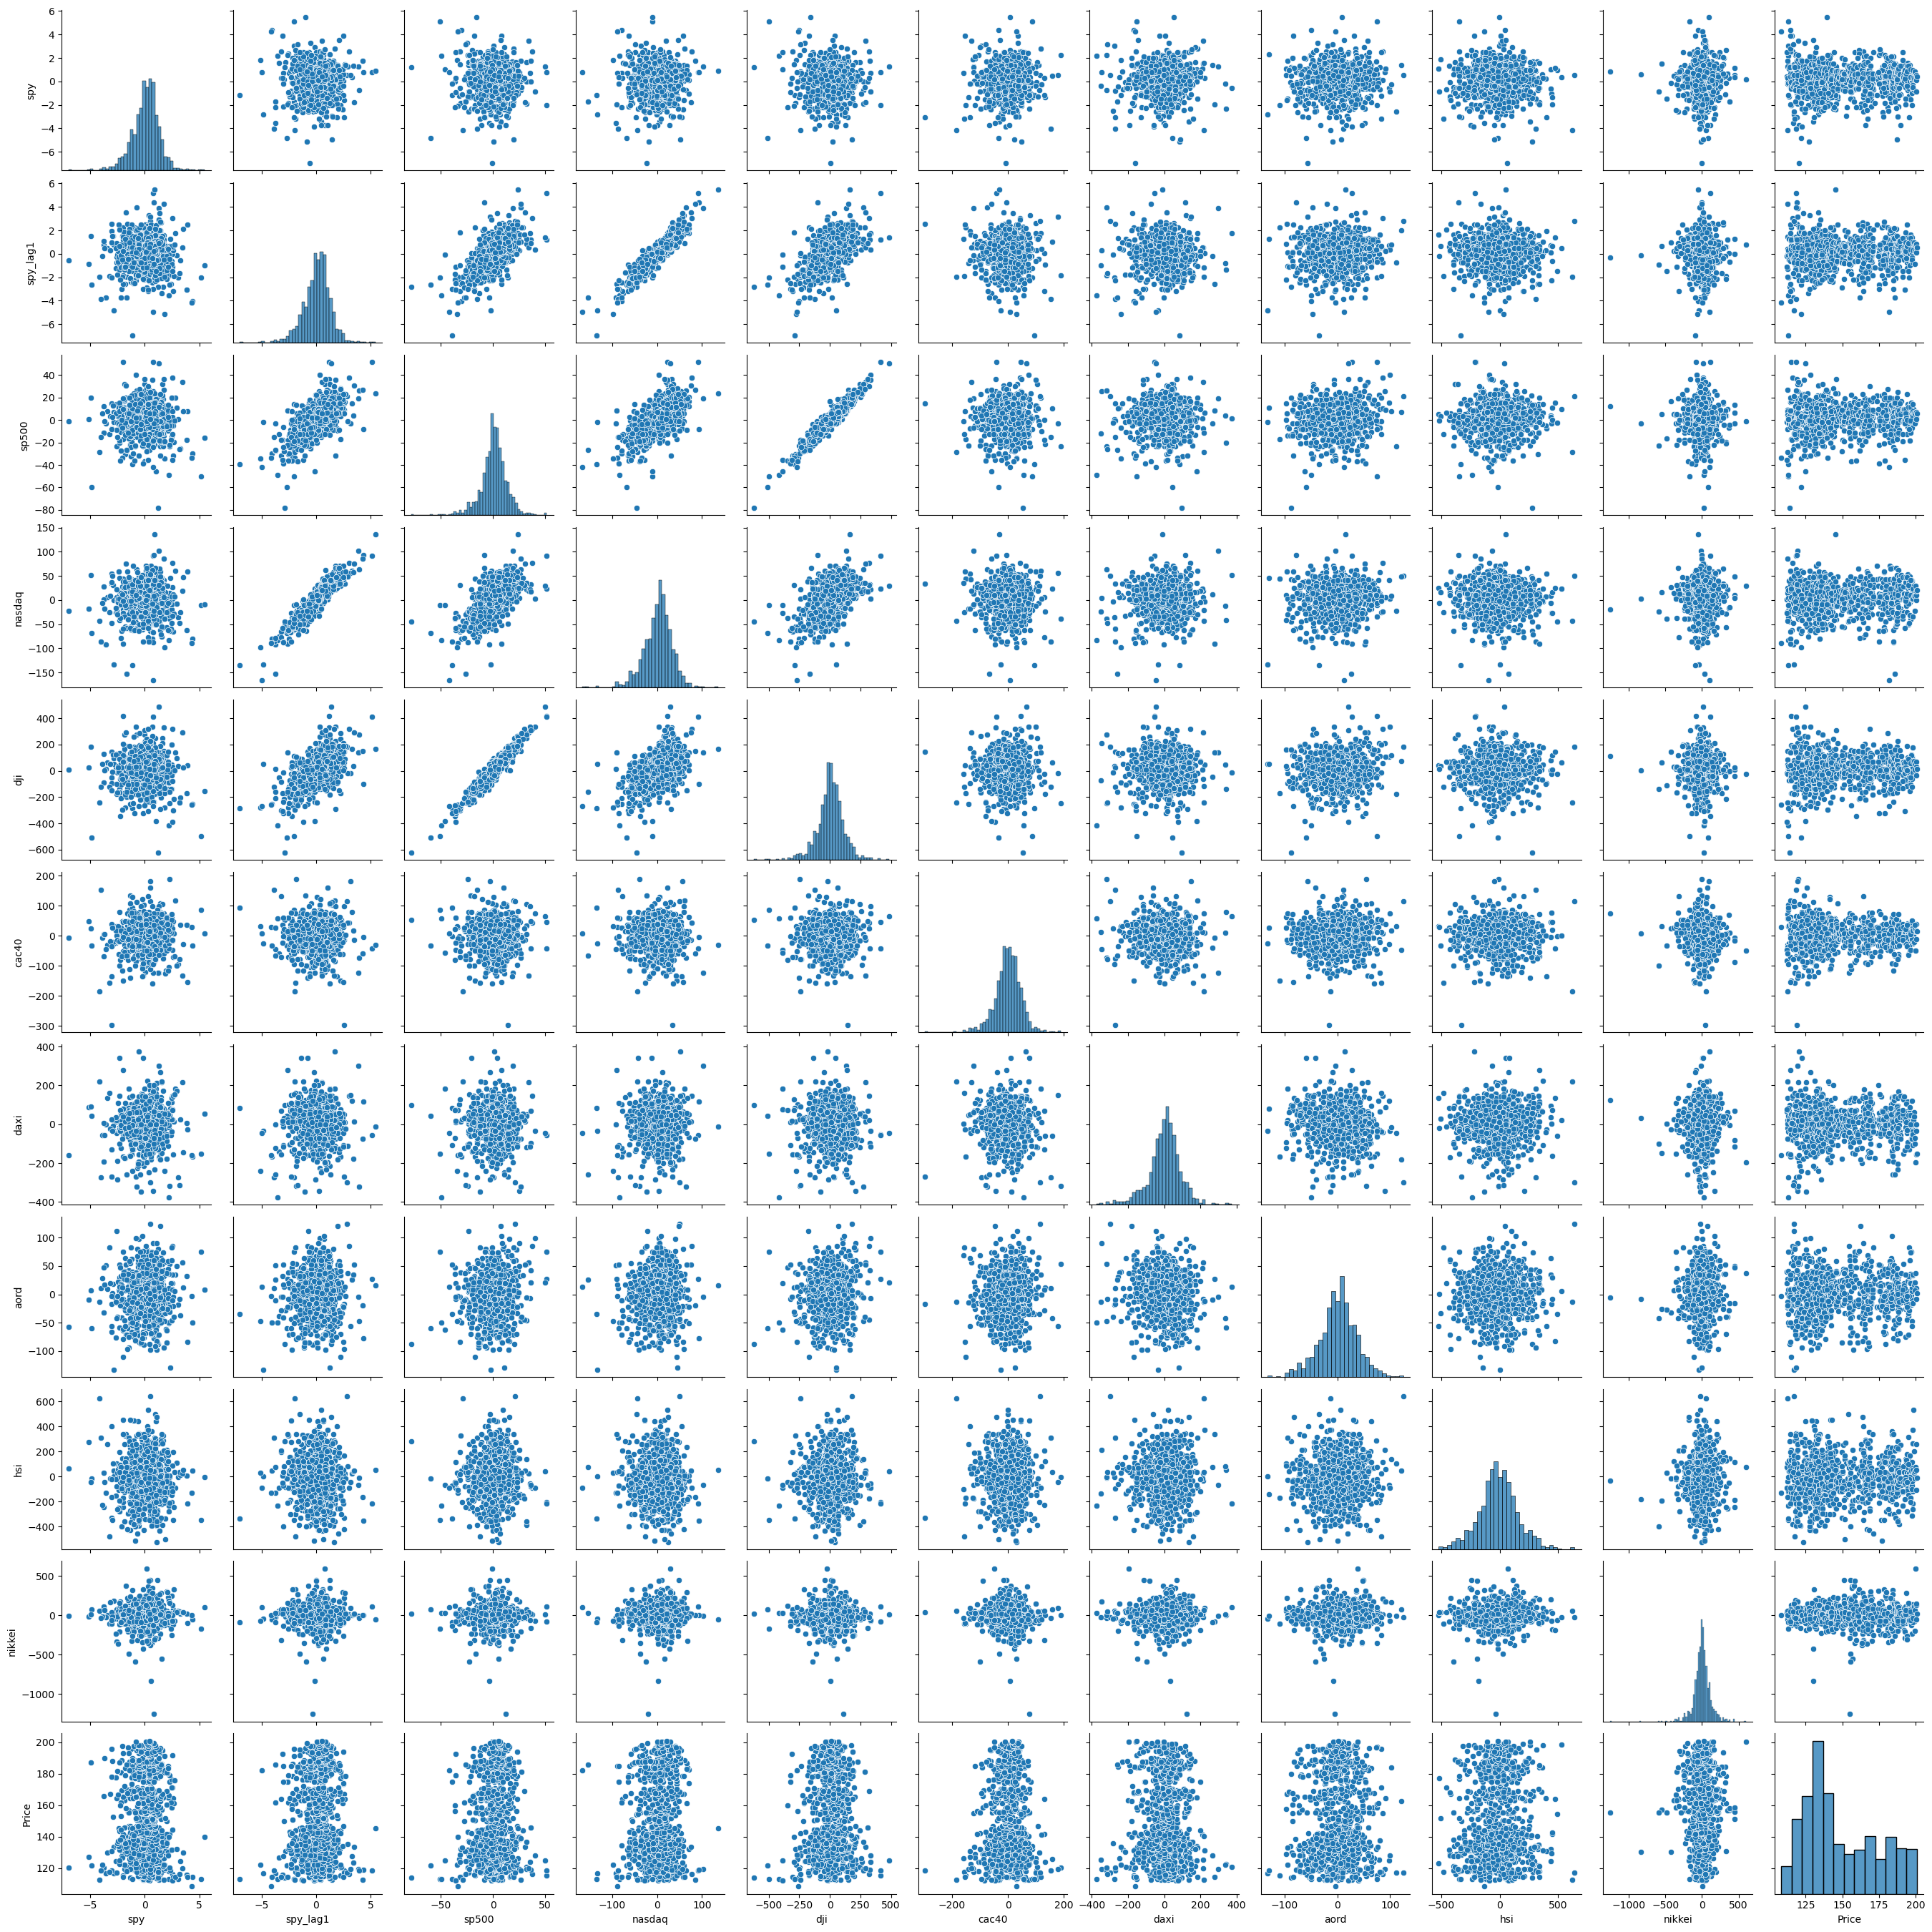

In [37]:
sns.pairplot(train)

### Step 4: Check the correlation of each index between spy

In [40]:
corr_array = train.corr()['spy']

<Axes: >

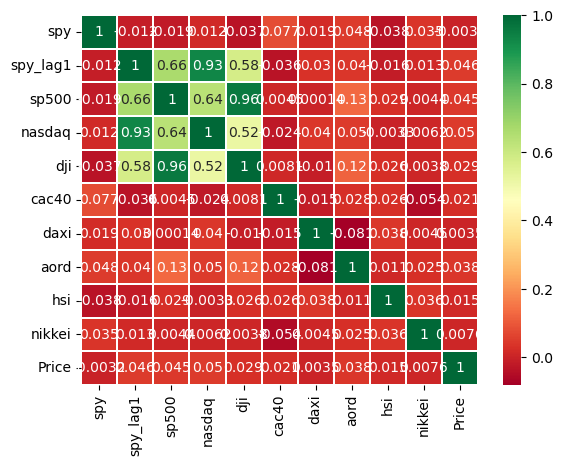

In [45]:
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

In [47]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula = formula, data = train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.133
Date:                Wed, 29 Mar 2023   Prob (F-statistic):             0.0245
Time:                        09:56:12   Log-Likelihood:                -1643.1
No. Observations:                1000   AIC:                             3306.
Df Residuals:                     990   BIC:                             3355.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0798      0.040      1.993      0.047       0.001       0.158
spy_lag1      -0.1233      0.092     -1.340      0.180      -0.304       0.057
sp500          0.0178      0.014      1.273      0.203      -0.010       0.045
nasdaq         0.0047      0.004      1.240      0.215      -0.003       0.012
dji           -0.0023      0.001     -1.588      0.113      -0.005       0.001
cac40          0.0021      0.001      2.485      0.013       0.000       0.004
aord           0.0017      0.001      1.497      0.135      -0.001       0.004
daxi           0.0003      0.000      0.724      0.469      -0.001       0.001
nikkei         0.0004      0.000      1.293      0.196      -0.000       0.001
hsi           -0.0003      0.000     -1.412      0.158      -0.001       0.000
==============================================================================
Omnibus:                       85.811   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.379
Skew:                          -0.444   Prob(JB):                     7.73e-52
Kurtosis:                       5.205   Cond. No.                         385.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
train['PredictY'] = lm.predict(train)
test['PredictY'] = lm.predict(test)

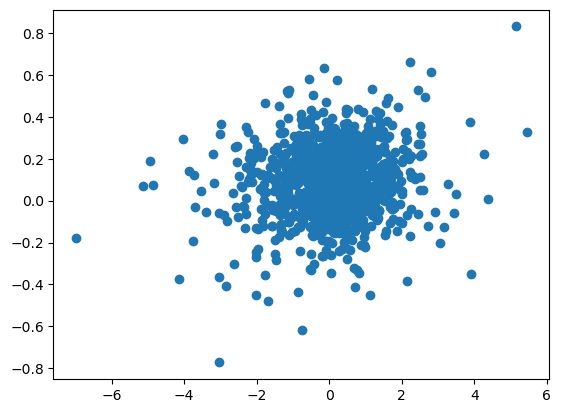

In [49]:
plt.scatter(train['spy'], train['PredictY'])
plt.show()

### Step 6: Model evaluation - Statistical standard

We can measure the performance of our model using some statistical metrics - **RMSE**, **Adjusted $R^2$ **

In [50]:
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [51]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [53]:
# Get the assement table fo our model
assessTable(test, train, lm, 9, 'spy')

,Train,Test
R2,0.010102,0.013609
RMSE,1.257534,1.759693
